<a href="https://colab.research.google.com/github/LesG016/Portafolio-caso-2/blob/main/Clientes_supermercado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
# biblioteca de análisis de datos, muestra estructuras de datos y herramientas para trabajar datos tabulares.
import numpy as np
#Biblioteca para cálculos numéricos en Python.
from sklearn.model_selection import train_test_split
#Permite dividir datos en conjuntos de entrenamiento y prueba.
from sklearn.ensemble import RandomForestRegressor
#Algoritmo de aprendizaje automático basado en árboles para el modelo de regresión
from sklearn.preprocessing import LabelEncoder
#Ayuda a codificar etiquetas categóricas en valores numéricos.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#Métricas que utilizaremos para evaluar el rendimiento del modelo.
import ipywidgets as widgets
#Biblioteca para crear widgets interactivos en Jupyter Notebook.
from IPython.display import display
#Permite mostrar los widgets en Jupyter Notebook.
from google.colab import files
#Para subir archivos desde nuestro sistema local a colab


In [3]:
# Subir archivo
uploaded = files.upload()

# Cuando el archivo ha side subido, establecerlo como directorio actual
ruta_archivo = 'clientes.xlsx'


Saving clientes.xlsx to clientes.xlsx


In [4]:
# Leer archivo de Excel en un DataFrame
data = pd.read_excel(ruta_archivo)

# Exploración inicial de los datos
print(data.head())
print(data.info())

# Eliminar filas con valores faltantes
data_cleaned = data.dropna()

# Separar características (features) y las variables objetivo (targets)
X = data_cleaned[['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome']]
y = data_cleaned[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                  'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Z_CostContact']]

# Codificar las columnas categóricas
label_encoders = {}
for column in ['Education', 'Marital_Status']:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635  ...              546              172   
1  2014-03-08       38        11  ...                6                2   
2  2013-08-21       26       426  ...              127              111   
3  2014-02-10       26        11  ...               20               10   
4  2014-01-19       94       173  ...              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0      

<ipython-input-4-08e7c3efd00a>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])
<ipython-input-4-08e7c3efd00a>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])


In [5]:
# Entrenar el modelo
model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [6]:
# Función para predecir las variables objetivo basado en nuevos datos
def predecir_variables(year_birth, education, marital_status, income, kidhome, teenhome):
    # Convertir las características categóricas a numéricas
    education_encoded = label_encoders['Education'].transform([education])[0]
    marital_status_encoded = label_encoders['Marital_Status'].transform([marital_status])[0]

    # Crear el DataFrame con los nuevos datos
    nuevo_dato = pd.DataFrame({
        'Year_Birth': [year_birth],
        'Education': [education_encoded],
        'Marital_Status': [marital_status_encoded],
        'Income': [income],
        'Kidhome': [kidhome],
        'Teenhome': [teenhome]
    })

    # Hacer la predicción
    predicciones = model.predict(nuevo_dato)

    return predicciones[0]


In [10]:
# Crear widgets para la entrada de datos
year_birth_widget = widgets.IntText(description='Año nacimiento:')
education_widget = widgets.Text(description='Educación:')
marital_status_widget = widgets.Text(description='Estado civil:')
income_widget = widgets.FloatText(description='Ingresos:')
kidhome_widget = widgets.IntText(description='Hogar con niños (1 es si y 0 es no):')
teenhome_widget = widgets.IntText(description='Hogar con adolescentes (1 es si y 0 es no):')
button = widgets.Button(description='Predecir')

# Definir los nombres de las columnas objetivo
target_columns = [
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
    'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Z_CostContact'
]

# Función que será llamada al hacer clic en el botón
def on_button_clicked(b):
    year_birth = year_birth_widget.value
    education = education_widget.value
    marital_status = marital_status_widget.value
    income = income_widget.value
    kidhome = kidhome_widget.value
    teenhome = teenhome_widget.value

    # Predecir las variables objetivo
    predicciones = predecir_variables(year_birth, education, marital_status, income, kidhome, teenhome)

    # Mostrar el resultado con etiquetas
    resultados = {target_columns[i]: predicciones[i] for i in range(len(target_columns))}
    print('Predicciones:')
    for columna, valor in resultados.items():
        print(f'{columna}: {valor}')

# Asignar la función al botón
button.on_click(on_button_clicked)

# Mostrar widgets
display(year_birth_widget, education_widget, marital_status_widget, income_widget, kidhome_widget, teenhome_widget, button)



IntText(value=0, description='Año nacimiento:')

Text(value='', description='Educación:')

Text(value='', description='Estado civil:')

FloatText(value=0.0, description='Ingresos:')

IntText(value=0, description='Hogar con niños (1 es si y 0 es no):')

IntText(value=0, description='Hogar con adolescentes (1 es si y 0 es no):')

Button(description='Predecir', style=ButtonStyle())

Los resultados para una mujer casada nacida en 1972, graduada de una licenciatura con ingresos mensuales de 4500, un hogar sin hijos pero con adolescentes tiene los siguientes resultados


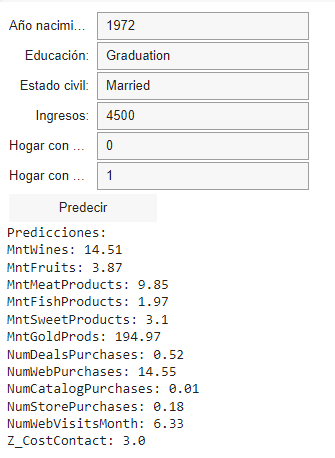

Para una mujer divorciada nacida en 1976, sin estudios universitarios con ingresos mensuales de 8000 que tiene niños pequeños y adolescentes tiene los siguientes resultados:


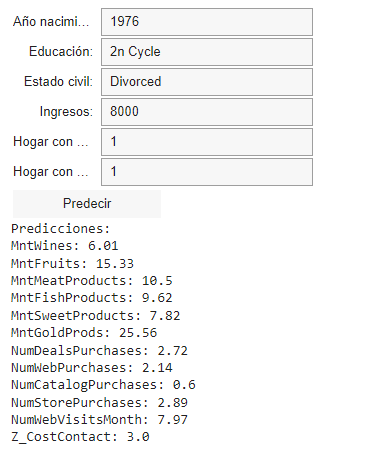

Una mujer sioltera nacida en 1998 con un doctorado sin niños y sin adolescentes con un ingreso de 7680 tiene los siguientes resultados:


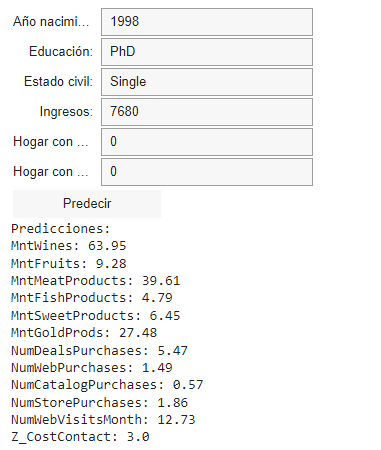